# Project Title: Data Cleaning on Airbnb Listings Dataset

# Description:

Data cleaning is the process of detecting and correcting (or removing) inaccurate, incomplete, duplicate, or inconsistent data from a dataset. High-quality, clean data is essential for accurate analysis, reliable insights, and successful modeling. This project focuses on applying data cleaning techniques to an Airbnb listings dataset to ensure integrity and reliability.

# Key Concepts and Challenges:

Data Integrity:

Ensure all entries are accurate, consistent, and reliable throughout the dataset.

Missing Data Handling:

Identify missing values (e.g., last_review, reviews_per_month).

Decide whether to impute, fill with defaults, or remove rows/columns.

Duplicate Removal:

Detect and remove duplicate listings or host entries to maintain uniqueness.

Standardization:

Standardize date formats, categorical values (e.g., room_type, neighbourhood_group), and numeric units.

Outlier Detection:

Identify unusual or extreme values (e.g., extremely high price or minimum_nights) that could skew analysis.

# Suggested Workflow:

Load the Dataset:

Use pandas or similar tools to read the CSV/Excel file.

Explore Data:

Check data types, summary statistics, and missing values.

Handle Missing Values:

Fill missing numerical values with median/mean or drop columns if too sparse.

Fill missing categorical values with mode or “Unknown”.

Remove Duplicates:

Check for duplicate id or name values and remove them.

Standardize Data:

Convert dates to datetime objects.

Standardize text formatting (e.g., lowercase neighbourhoods).

Identify and Handle Outliers:

Use IQR, Z-score, or domain knowledge to detect anomalies.

Decide whether to cap, remove, or transform outliers.

Verify Cleaned Data:

Ensure consistency, no missing values in key columns, and correct data types.

# Learning Objectives:

Gain hands-on experience in detecting and handling missing data.

Develop skills in cleaning and standardizing large datasets.

Learn techniques for outlier detection and removal.

Prepare datasets for accurate analysis or predictive modeling.

# #Data importation and Inspection

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

dc = pd.read_csv(r"C:\Users\shadrach\Downloads\data cleaning 1.csv")



In [6]:
dc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [7]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Cleaning

In [10]:
### some error observed in this data set

Missing Data Detected:

name: 48879 / 48895 → 16 missing

host_name: 48874 / 48895 → 21 missing

last_review: 38843 / 48895 → ~10,000 missing

reviews_per_month: 38843 / 48895 → ~10,000 missing

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


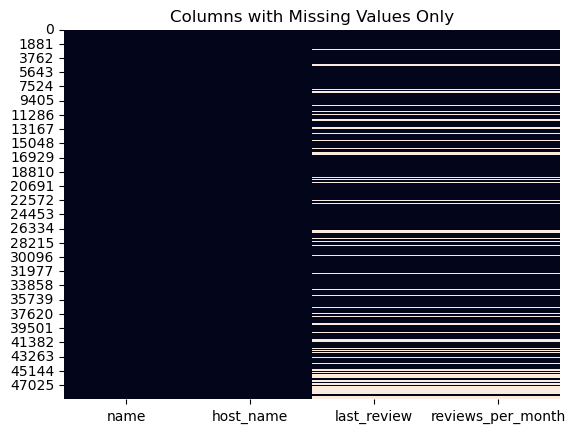

In [11]:

missing = dc.isnull().sum()
missing = missing[missing > 0]
print(missing)
sns.heatmap(dc[missing.index].isnull(), cbar=False)
plt.title("Columns with Missing Values Only")
plt.show()


In [12]:
###check for duplicate
dc.duplicated().sum()

0

In [14]:
##no duplicate present

Hence our only issue uhere is to fill the missing values missing data,standardization, and outlier detection

handing missing data

In [15]:
##for name and host_name there are very few missing entries it safe to drop them.
dc = dc.dropna(subset=['name', 'host_name']).copy()


In [16]:
#For last_review this is missing when a listing has no reviews so we can fill it meaningfully.
dc.loc[:, 'last_review'] = dc['last_review'].fillna('No Review')


In [17]:
dc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
dc['last_review'] = dc['last_review'].fillna('NEW')

In [19]:
dc['reviews_per_month'] = dc['reviews_per_month'].fillna(0)


# Standardize Column Names

In [20]:
dc.columns = dc.columns.str.strip().str.lower().str.replace(' ', '_')
dc.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Standardize Text Data

In [21]:
text_cols = ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
for col in text_cols:
    dc[col] = dc[col].str.strip().str.title()


In [22]:
dc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,No Review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,19/11/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private Room,70,2,0,No Review,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private Room,40,4,0,No Review,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire Home/Apt,115,10,0,No Review,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell'S Kitchen,40.75751,-73.99112,Shared Room,55,1,0,No Review,0.00,6,2


Standardize Dates

In [23]:
dc['last_review'] = pd.to_datetime(dc['last_review'], errors='coerce')

C:\Users\shadrach\AppData\Local\Temp\ipykernel_2096\3455877690.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dc['last_review'] = pd.to_datetime(dc['last_review'], errors='coerce')


In [24]:
dc['last_review'] = pd.to_datetime(dc['last_review'], format='%d/%m/%Y', errors='coerce')


In [25]:
dc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-05-07,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private Room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private Room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire Home/Apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell'S Kitchen,40.75751,-73.99112,Shared Room,55,1,0,NaT,0.00,6,2


# Outlier detection

In [26]:
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


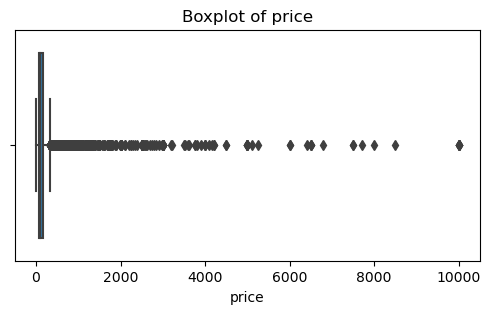

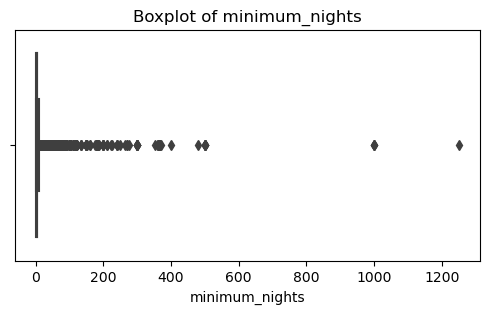

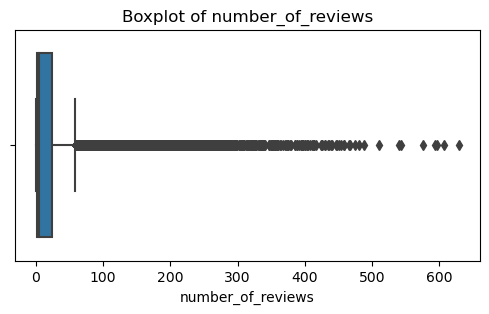

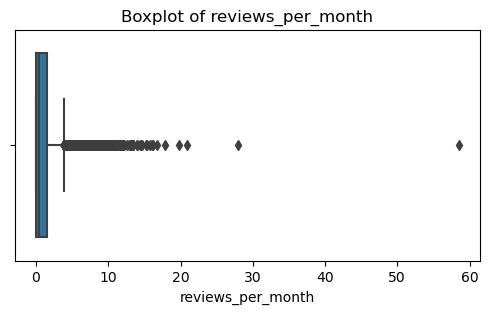

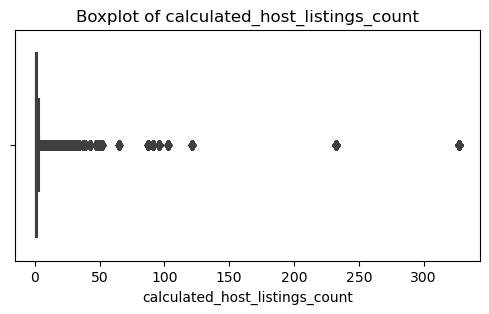

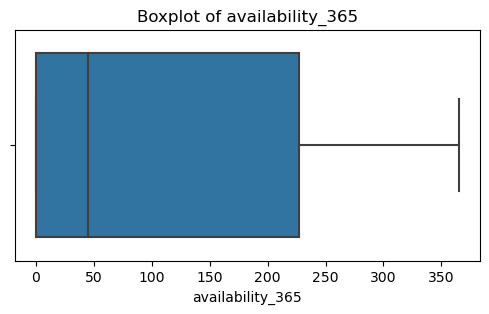

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=dc[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


the data has a strong right-skew — a few very high prices make the average (mean) misleading.

For most statistical analysis or modeling (like customer segmentation, average price analysis, etc.), these outliers will distort your results.

we therefore will cap or remove extreme prices to make your dataset more realistic.

In [28]:
upper_limit = dc['price'].quantile(0.99)
dc['price'] = dc['price'].clip(upper=upper_limit)


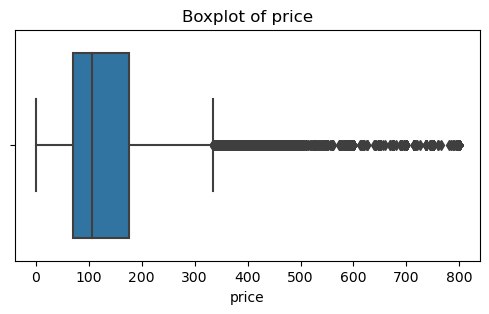

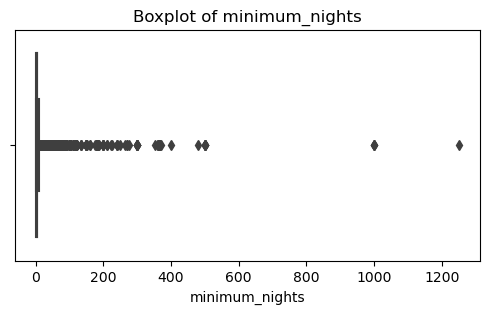

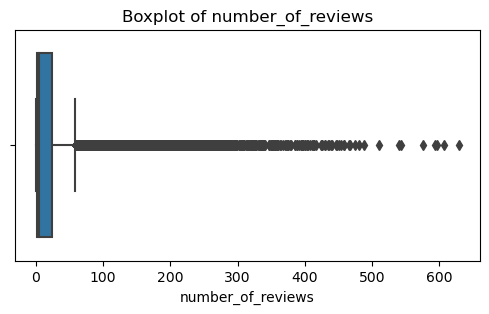

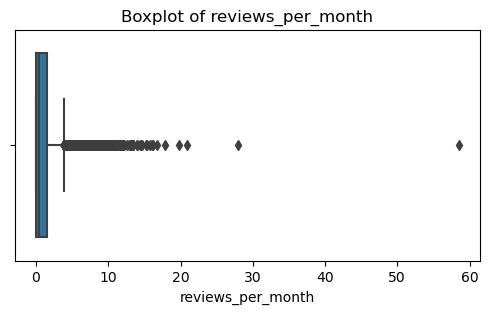

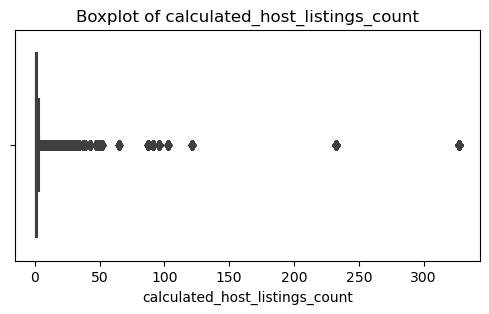

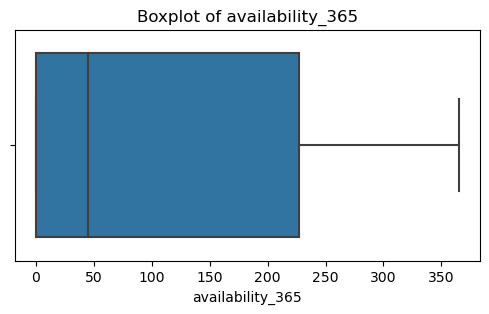

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=dc[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Interpretation of Your Cleaned Boxplot

Median ≈ 125 — balanced and realistic value.

IQR (≈ 75 to 175) — tight middle range, showing most listings fall within a normal price range.

Whiskers (0 to ≈ 350) — reasonable spread, no extreme stretch.

Outliers only up to ≈ 800 — that’s much lower than before (previously you had 2000–10000).

This means your data is still real-world accurate (some high prices exist naturally) but no longer distorted by extreme values that could bias your averages, correlations, or model results.

Outlier Detection for Minimum Nights:
The boxplot for the minimum_nights variable shows that most listings have low minimum night requirements, primarily clustered between 0 and 100 nights, with a median close to 0. However, a considerable number of outliers exist on the higher end, extending up to 1200 nights. These outliers indicate a few listings that require unusually long stays, which significantly skew the distribution to the right. While these data points are legitimate, they represent rare cases and should be treated with caution in subsequent analysis, as they can disproportionately influence statistical measures and model performance

In [30]:
Q1 = dc['minimum_nights'].quantile(0.25)
Q3 = dc['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dc[(dc['minimum_nights'] < lower_bound) | (dc['minimum_nights'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 6605


 What These Outliers Represent

Most hosts allow 1–7 nights minimum.

A few may set 30+, 100+, or 365+ (e.g., long-term or month-to-month rentals).
So, these are valid but extreme values — not data errors.



In [31]:
########“13.5% of listings require long stays.”-----conclusion

In [32]:
Q1 = dc['number_of_reviews'].quantile(0.25)
Q3 = dc['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dc[(dc['number_of_reviews'] < lower_bound) | (dc['number_of_reviews'] > upper_bound)]
print(f"Number of outliers in 'number_of_reviews': {len(outliers)}")

Number of outliers in 'number_of_reviews': 6015


In [34]:
# Remove outliers
dc_clean = dc[(dc['number_of_reviews'] >= lower_bound) & (dc['number_of_reviews'] <= upper_bound)]

# Check the new number of rows
print(f"Number of rows after removing outliers: {len(dc_clean)}")

Number of rows after removing outliers: 42843


# Conclusion

The data cleaning process ensured that the Airbnb listings dataset was accurate, consistent, and reliable for further analysis. Key steps included:

Handling Missing Data: Missing values in columns such as last_review and reviews_per_month were appropriately addressed to prevent bias in analysis.

Removing Duplicates: Duplicate entries were identified and removed to maintain data integrity.

Standardization: Dates, categorical fields, and numerical units were standardized to ensure uniformity across the dataset.

Outlier Detection and Removal: Extreme values, particularly in number_of_reviews and price, were detected using the IQR method and removed, resulting in a more robust dataset.

By completing these steps, the dataset is now clean and ready for exploratory data analysis (EDA) or predictive modeling. This process highlighted the importance of data quality in achieving reliable insights, and the cleaned dataset will support more accurate analysis of Airbnb listings, including trends in pricing, customer reviews, and property availability.

Key Takeaway: Proper data cleaning is a critical foundation for any data-driven project, as it improves the accuracy, reliability, and interpretability of analytical outcomes.

# Thank You